In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

<h4>1. Исходный график функции y = sin(x)</h4>

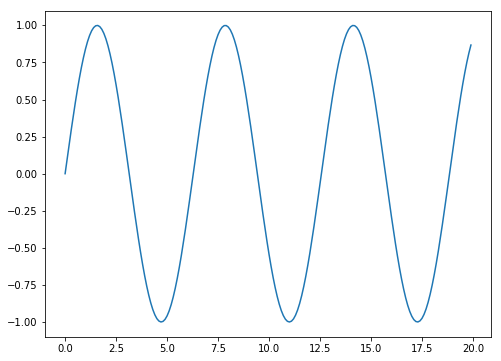

In [2]:
X = np.arange(0, 20, 0.1)
y = np.sin(X)
plt.plot(X, y);

<h4>2. Подготовка входных данных</h4>

In [3]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size
train, test = y[0:train_size], y[train_size:len(X)]
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
look_back = 3
trainX, trainY = create_dataset(train.reshape(-1, 1), look_back)
testX, testY = create_dataset(test.reshape(-1, 1), look_back)

<h4>3. Обучение модели</h4>

In [13]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)
knn.fit(trainX, trainY)
trainPredict = knn.predict(trainX)
testPredict = knn.predict(testX)
print("kNN(train) mse =", mean_squared_error(trainY, trainPredict))
print("kNN(test) mse =", mean_squared_error(testY, testPredict))

kNN(train) mse = 0.0
kNN(test) mse = 0.000508828186278


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(trainX, trainY)
trainPredict = lin_reg.predict(trainX)
testPredict = lin_reg.predict(testX)

print("LinearRegression(train) mse =", mean_squared_error(trainY, trainPredict))
print("LinearRegression(test) mse =", mean_squared_error(testY, testPredict))

LinearRegression(train) mse = 2.92562357676e-31
LinearRegression(test) mse = 1.77774038254e-30


In [14]:
nn = MLPRegressor(alpha=0.1, hidden_layer_sizes=(1000, 1000))
nn.fit(trainX, trainY)
trainPredict = nn.predict(trainX)
testPredict = nn.predict(testX)

print("NN(train) mse =", mean_squared_error(trainY, trainPredict))
print("NN(test) mse =", mean_squared_error(testY, testPredict))

nn_grid = GridSearchCV(nn, param_grid={
    'alpha': 10.0 ** -np.arange(1, 7),
    'hidden_layer_sizes': [(5, 5), (100, 100), (1000, 1000)]},
    cv=5, n_jobs=4
)
nn_grid.fit(trainX, trainY)
nn_grid.best_params_

NN(train) mse = 0.00160112643708
NN(test) mse = 0.0015818915504


{'alpha': 0.10000000000000001, 'hidden_layer_sizes': (1000, 1000)}

<h4>4. Визуализация качества модели</h4>
<p>Синяя линия - исходный график синуса</p>
<p>Оранжевая линия - предсказание модели на тренировочных данных</p>
<p>Зеленая линия - предсказание модели на тестовых данных</p>
<p>Красная линия - модель уже сама продолжает график синуса</p>

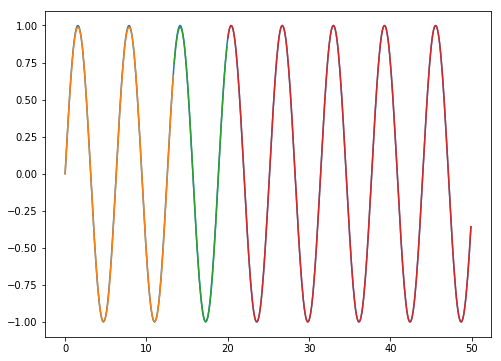

In [10]:
X = np.arange(0, 50, 0.1)
plt.plot(X,np.sin(X))
y_train_pred = np.r_[y[0:look_back], trainPredict]
plt.plot(X_train, y_train_pred)
y_test_pred = np.r_[y[train_size:train_size + look_back], testPredict]
plt.plot(X_test, y_test_pred)

Xx = np.arange(20, 50, 0.1)
yy = y[len(y) - look_back:len(y)]

nextX = yy

for i in range(len(Xx)):
    pred = lin_reg.predict(nextX.reshape(1, -1))
    yy = np.append(yy, pred)
    nextX = np.append(nextX[1:len(nextX)], pred)

plt.plot(Xx, yy[look_back:len(yy)]);

<h4>5. Исходный график функции y = sin(0.5 \* x) + 0.1\*sin(7 \* x)</h4>

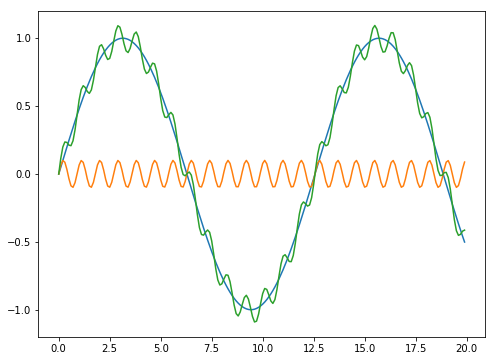

In [16]:
X = np.arange(0, 20, 0.1)
y = np.sin(0.5 * X)
yy = 0.1 * np.sin(X * 7)
plt.plot(X, y);
plt.plot(X, yy);
plt.plot(X, y + yy);
y = y + yy

kNN(train) mse = 0.0
kNN(test) mse = 0.000508828186278


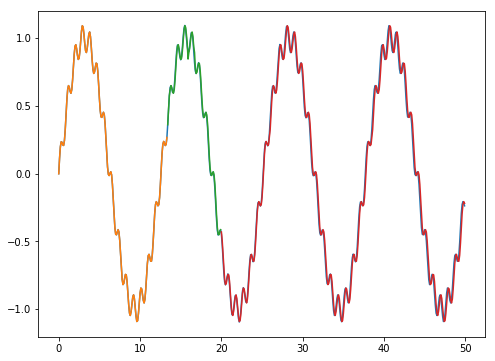

In [17]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size
train, test = y[0:train_size], y[train_size:len(X)]
X_train, X_test = X[0:train_size], X[train_size:len(X)]

look_back = 3
trainX, trainY = create_dataset(train.reshape(-1, 1), look_back)
testX, testY = create_dataset(test.reshape(-1, 1), look_back)

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)
knn.fit(trainX, trainY)
trainPredict = knn.predict(trainX)
testPredict = knn.predict(testX)
print("kNN(train) mse =", mean_squared_error(trainY, trainPredict))
print("kNN(test) mse =", mean_squared_error(testY, testPredict))

X = np.arange(0, 50, 0.1)
plt.plot(X, np.sin(0.5 * X) + 0.1 * np.sin(X * 7));
y_train_pred = np.r_[y[0:look_back], trainPredict]
plt.plot(X_train, y_train_pred);
y_test_pred = np.r_[y[train_size:train_size + look_back], testPredict]
plt.plot(X_test, y_test_pred);

Xx = np.arange(20, 50, 0.1)
yy = y[len(y) - look_back:len(y)]

nextX = yy

for i in range(len(Xx)):
    pred = knn.predict(nextX.reshape(1, -1))
    yy = np.append(yy, pred)
    nextX = np.append(nextX[1:len(nextX)], pred)

plt.plot(Xx, yy[look_back:len(yy)]);